Categories of Text are:
No. of Training Samples =  11314
No. of Test Samples =  7532
No. of Categories in Text 20
From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>

              precision    

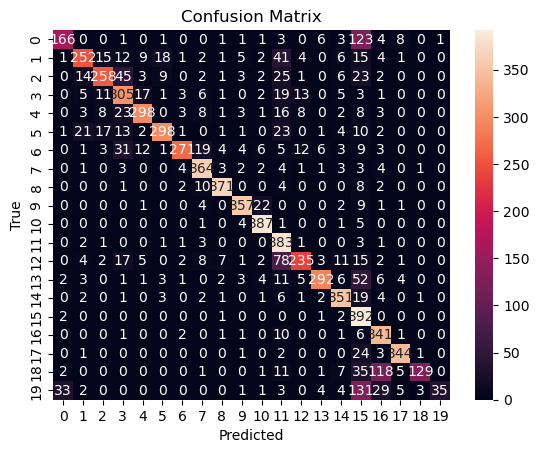

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Data Acquisition and About the Dataset
# Load the 20 Newsgroups dataset from sklearn
data = fetch_20newsgroups()

# Categories of Text
text_categories = data.target_names
print('Categories of Text are:')
text_categories

# Define the training set
train_data = fetch_20newsgroups(subset="train", categories=text_categories)

# Define the test set
test_data = fetch_20newsgroups(subset="test", categories=text_categories)
print('No. of Training Samples = ', len(train_data.data))
print('No. of Test Samples = ', len(test_data.data))
print('No. of Categories in Text', len(text_categories))

# Sample Text data
print(train_data.data[1])

# Model Building
# Build the pipeline of Vectorization and Model Building
nb = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model using the training data
nb.fit(train_data.data, train_data.target)

# Prediction of the Test Dataset
y_pred = nb.predict(test_data.data)

# Actual value and the predicted value
test = pd.DataFrame({'Actual value': test_data.target, 'Predicted value': y_pred})
test.head()

# Evaluation of the Model
matrix = confusion_matrix(test_data.target, y_pred)
sb.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(test_data.target, y_pred))

# Prediction for a New Unseen Text
def my_predictions(my_sentence, model):
    all_categories_names = np.array(data.target_names)
    prediction = nb.predict([my_sentence])
    return all_categories_names[prediction]

my_sentence = "God"
print(my_predictions(my_sentence, nb))

my_sentence = "I am using Microsoft Windows Operating System"
print(my_predictions(my_sentence, nb))

my_sentence = "India is a parliamentary secular democratic republic"
print(my_predictions(my_sentence, nb))
